# Separability of phase and orientation

**Imports**

In [1]:
%matplotlib inline

import sys
import seaborn as sns
import sympy as sp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
sys.path.insert(0, './model')
sys.path.insert(0, './numerical')

from sym_model import *
from model import decoding
from model import persistence
from utils import get_orientation_phase_grid

In [2]:
p_func = sp.lambdify(
                (x0, y0, k, sigma, phi_rf, theta_rf, phi_grating, theta_grating, ),
                p, 'numpy')


In [3]:

n_theta, n_phi = 36, 72
# n_theta, n_phi = 9, 12
step_phi, step_theta = 360 // n_phi, 180 // n_theta

In [4]:
grid = get_orientation_phase_grid(step_phi, step_theta)
grid = grid.reshape((-1, 2))

In [5]:
res = (np.abs(p_func(0, 0, 6, 1, 0, 0, grid[:, 1], grid[:, 0])) * 10).reshape((n_phi, n_theta))
get_res = lambda x, y: (np.abs(p_func(x, y, 6, 1, 0, 0, grid[:, 1], grid[:, 0])) * 10).reshape((n_phi, n_theta))

In [6]:
def reconstruct(img: np.ndarray):
    x_avg = np.mean(img, axis=0)
    y_avg = np.mean(img, axis=1)
    new_image = np.outer(y_avg, x_avg)
    new_image *= np.sum(img) / np.sum(new_image)
    return new_image

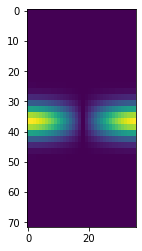

In [7]:
plt.imshow(res)

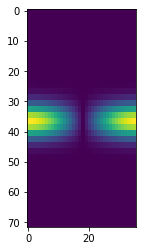

In [8]:
plt.imshow(reconstruct(res))

In [9]:
def separability(img):
    return (np.mean(np.abs(img)) - np.mean(np.abs(img - reconstruct(img)))) / np.mean(np.abs(img))

In [10]:
separability(res)

Text(0.5, 0, 'x')

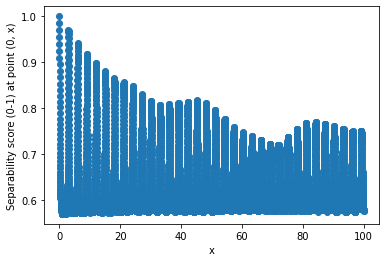

In [11]:
xs = np.linspace(0, 100, 10001)
data = [separability(get_res(0, x)) for x in xs]
plt.scatter(xs, data)
plt.ylabel('Separability score (0-1) at point (0, x)')
plt.xlabel('x')

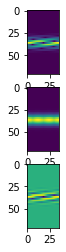

In [14]:
fig, ax = plt.subplots(3, 1)

res2 = (np.abs(p_func(0, 5, 6, 1, 0, 0, grid[:, 1], grid[:, 0])) * 10).reshape((n_phi, n_theta))
ax[0].imshow(res2)
ax[1].imshow(reconstruct(res2))
ax[2].imshow(res2 - reconstruct(res2))